# 1. Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, output_notebook , show , output_file,reset_output
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral5,Spectral10
import bokeh 
from bokeh.models import HoverTool
from bokeh.models.sources import ColumnDataSource
from bokeh.models.formatters import DatetimeTickFormatter

In [2]:
%matplotlib inline
plt.style.use('ggplot')

# 2. Read data from url

`pd.read_csv()` : Read a comma-separated values (csv) file into DataFrame.


In [3]:
dataset = pd.read_csv('owid-covid-data.csv',parse_dates=['date'],index_col='date')

# 3. Identify data types 
`DataFrame.info()` : prints information about a DataFrame including the index dtype and columns
`DataFrame.describe()` : generate descriptive statistics.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50301 entries, 2020-03-13 to 2020-10-15
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         50011 non-null  object 
 1   continent                        49721 non-null  object 
 2   location                         50301 non-null  object 
 3   total_cases                      49665 non-null  float64
 4   new_cases                        49439 non-null  float64
 5   new_cases_smoothed               48657 non-null  float64
 6   total_deaths                     49665 non-null  float64
 7   new_deaths                       49439 non-null  float64
 8   new_deaths_smoothed              48657 non-null  float64
 9   total_cases_per_million          49375 non-null  float64
 10  new_cases_per_million            49375 non-null  float64
 11  new_cases_smoothed_per_million   48592 non-null  float64
 12  t

In [5]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.966500e+04,49439.000000,48657.000000,4.966500e+04,49439.000000,48657.000000,49375.000000,49375.000000,48592.000000,49375.000000,...,44230.000000,29496.000000,44805.000000,46414.000000,35026.000000,34579.000000,21055.000000,40428.000000,49375.000000,43242.000000
mean,1.195808e+05,1560.718845,1545.047819,4.528506e+03,44.221161,44.305880,2208.635648,27.720477,27.006892,63.179023,...,20813.918614,12.227156,251.862129,8.050559,10.787428,32.635691,52.315781,3.104097,73.994241,0.723999
std,1.235767e+06,14074.821975,13848.545713,4.193538e+04,370.399641,360.225437,4566.847850,92.712991,63.570126,150.024977,...,20392.155234,19.301168,117.438071,4.151930,10.475137,13.430938,31.625998,2.522259,7.383849,0.153003
min,0.000000e+00,-8261.000000,-552.000000,0.000000e+00,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,7.300000e+01,0.000000,0.714000,1.000000e+00,0.000000,0.000000,40.322000,0.000000,0.180000,0.076000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.201000e+03,11.000000,16.571000,2.400000e+01,0.000000,0.286000,326.870000,1.755000,3.270500,5.852000,...,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.353500e+04,183.000000,189.571000,2.800000e+02,3.000000,3.286000,2314.697000,20.331000,22.523500,42.794500,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,3.858123e+07,388539.000000,336660.571000,1.093140e+06,10468.000000,7459.143000,45029.246000,8652.658000,1236.094000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


# 4. Data Preprocessing
## 4.1 Fill missing values
Firstly, the data is sorted on basis of the date in ascending order. A new fresh copy of data set is made for preprocessing. The first step of pre processing is filling missing values.

In [6]:
dataset.sort_index(inplace=True)
df_preprocessed = dataset.copy()

- For columns including new data for each day, missing values are replaced with zero
- For other columns previous valued are filled and where previous values do not exist  missing values are replaced with zero

In [7]:
#new vako column ma 0 fill garne
for column in dataset.columns:
    if 'new' in column:
        df_preprocessed[column] = df_preprocessed[column].fillna(0)
    else:
        df_preprocessed[column] = df_preprocessed[column].fillna(method='ffill').fillna(0)

In [8]:
x='highest'
x.replace('high','low')

'lowest'

In [9]:
def countires_with_most(df,feature,top=5):
    """
        Plots the top n countries on basis of specific feature
        
        Args:
        df object: A DataFrame object
        feature string: A feature in DataFrame object
        top int: Number of top countires
        ax object: Axes object
        
        Returns :
        temp object: A DataFrame object after aggregation
        title string: Title for plot
        
    """
    
    if "total" in feature:
        temp = df.groupby('location').apply(lambda x:x[[feature]].max(skipna=True)).dropna().sort_values(by=feature,ascending=False)
        title = "Top "+str(top)+" countries with highest "+" ".join(feature.split('_'))
    else:
        temp = df.groupby('location').apply(lambda x:x[[feature]].mean(skipna=True)).dropna().sort_values(by=feature,ascending=False)
        title = "Top "+str(top)+" countries with highest average "+" ".join(feature.split('_'))
    temp.drop(['World'],inplace=True)
    temp = temp[:top]
    return temp,title
    
def countires_with_least(df,feature,top=5):    
    """
        Plots the lowest n countries on basis of specific feature
        
        Args:
        df DataFrame: A DataFrame object
        feature string: A feature in DataFrame object
        top int: Number of lowest countires
        ax Axes: Axes object
        
        Returns :
        temp object: A DataFrame object after aggregation
        title string: Title for plot
        
    """
    if "total" in feature:
        temp = df.groupby('location').apply(lambda x:x[[feature]].max(skipna=True)).dropna().sort_values(by=feature,ascending=True)
        title = "Top "+str(top)+" countries with highest "+" ".join(feature.split('_'))
    else:
        temp = df.groupby('location').apply(lambda x:x[[feature]].mean(skipna=True)).dropna().sort_values(by=feature,ascending=True)
        title = "Top "+str(top)+" countries with highest average "+" ".join(feature.split('_'))
    temp.drop(['World'],inplace=True)
    temp = temp[:top]
    title = title.replace('high','low')
    return temp,title
#     plt.show()

# 4.2 Data visualization
## Facts:

United States has highest new cases followed by India, Brazil and Russia. 
Hong Kong has the least new cases followed by Anguilla and Montserrat. 

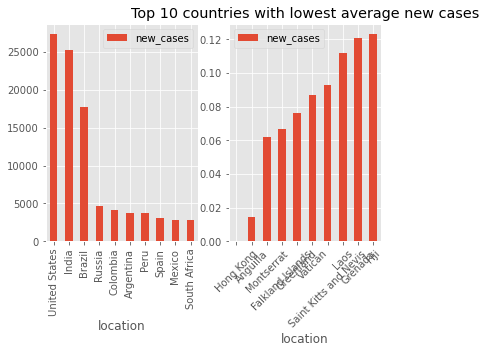

In [10]:
fig,ax = plt.subplots(1,2)
feature = 'new_cases'
temp,title = countires_with_most(df_preprocessed,feature,10)
fig = temp.plot(kind='bar',ax=ax[0])
plt.title(title)
plt.xticks(rotation='45')

temp,title = countires_with_least(df_preprocessed,feature,10)
fig = temp.plot(kind='bar',ax=ax[1])
plt.title(title)
plt.xticks(rotation='45')

plt.show()

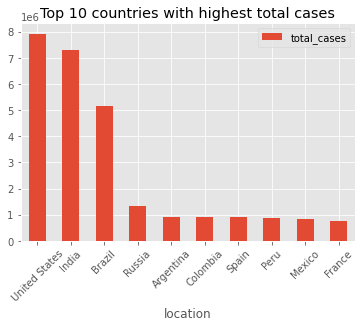

In [11]:
feature = 'total_cases'
temp,title = countires_with_most(df_preprocessed,feature,10)
fig = temp.plot(kind='bar',)
plt.title(title)
plt.xticks(rotation='45')
plt.show()

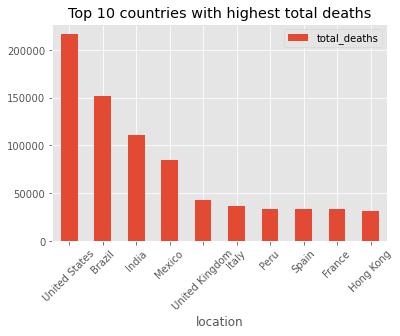

In [12]:
feature = 'total_deaths'
temp,title = countires_with_most(df_preprocessed,feature,10)
fig = temp.plot(kind='bar',)
plt.title(title)
plt.xticks(rotation='45')
plt.show()

## Fact 
Nepal has 3rd least hospital beds per thousand people followed by Ethiopia and Guineax

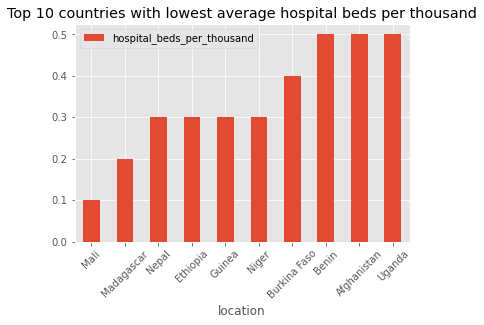

In [13]:
feature = 'hospital_beds_per_thousand'
temp,title = countires_with_least(df_preprocessed,feature,10)
fig = temp.plot(kind='bar',)
plt.title(title)
plt.xticks(rotation='45')
plt.show()


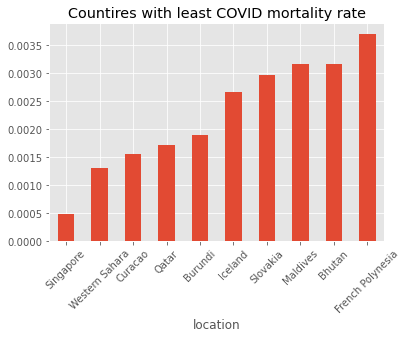

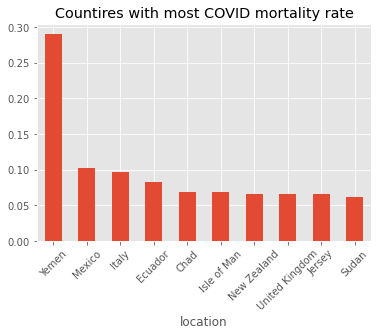

In [14]:
feature = 'hospital_beds_per_thousand'
hospital_beds = countires_with_most(df_preprocessed,feature,10)
plt.title('Countires with most hospital beds per thousand')
plt.xticks(rotation='45')

total_deaths = df_preprocessed.groupby('location').apply(lambda x:x['total_deaths'].max(skipna=True))
total_cases = df_preprocessed.groupby('location').apply(lambda x:x['total_cases'].max(skipna=True))

total_deaths.drop(['World'],inplace=True)
total_cases.drop(['World'],inplace=True)

# # total_deaths[:10].plot('bar')
covid_mortality_rate = pd.Series(total_deaths.values/total_cases.values)
covid_mortality_rate.index = total_cases.index
covid_mortality_rate.sort_values(ascending=True,inplace=True)
covid_mortality_rate = covid_mortality_rate[covid_mortality_rate > 0]
# hospital_beds_covid_mortality_rate = hospital_beds+covid_mortality_rate
# df_preprocessed['covid_mortality_rate'] = pd.Series(total_deaths.values/total_cases.values)
# feature = 'covid_mortality_rate'
# top,title = countires_with_most(df_preprocessed,feature,10)
# plt.title('Covid mortality rate of Countires with most hospital beds per thousand')
# plt.show()

covid_mortality_rate[:10].plot(kind='bar')
# plt.title('Covid mortality rate of Countires with most hospital beds per thousand')
# plt.show()

plt.title('Countires with least COVID mortality rate')
plt.xticks(rotation='45')
plt.show()

covid_mortality_rate[::-1][:10].plot(kind='bar')

plt.title('Countires with most COVID mortality rate')
plt.xticks(rotation='45')

plt.show()

# Was lockdown effective ?
Yes, if applied at the right time. As we can see in countries like China and Ne Zealand
as the number of cases grew government applied strict policies which can be infrerred through 
the stringency index. Due to which, the number of new cases and deaths were at a steep decline.
But in countries like Nepal and India where lockdown was imposed when number of cases were almost zero
the number of cases and deaths are still rising to its all time high.

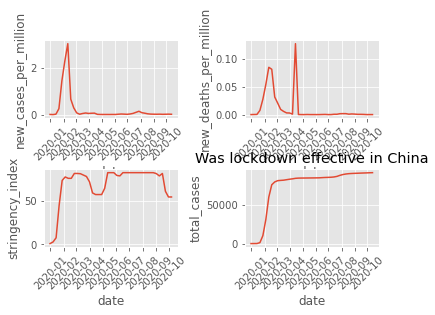

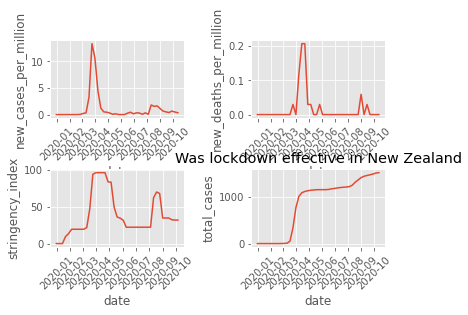

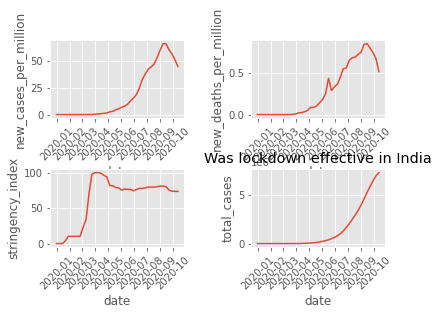

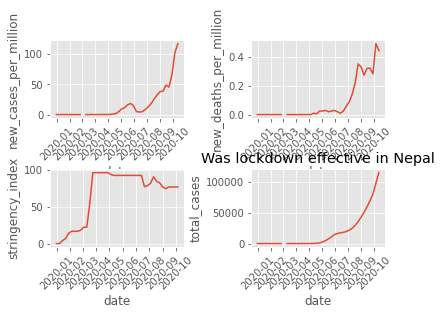

In [15]:
def visualize(country,features):
    df = dataset[df_preprocessed['location']==country].resample('7D').mean()
    length = len(features)
    length = length if length % 2 == 0 else length + 1
    row = 2
    col = length//2
    fig,ax = plt.subplots(row,col)
    fig.tight_layout(pad=3.0)
    i=0
    j=0
    if col == 1:
        
        for feature in features:
    #         j=0
            sns.lineplot(x='date',y=feature,data=df,ax=ax[i])
    #         j=j+1 if j < col else 0
            i=i+1 
    else:
        for feature in features:
            sns.lineplot(x='date',y=feature,data=df,ax=ax[i][j])
            i=i+1 if j+1 == col  else i
            j=j+1 if j+1 < col else 0
            
    for ax in fig.axes:
        ax.tick_params(axis='x',labelrotation=45)
    plt.title("Was lockdown effective in " +country,loc="center")
        
visualize('China',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])    
visualize('New Zealand',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])
visualize('India',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])
visualize('Nepal',['new_cases_per_million','new_deaths_per_million','stringency_index','total_cases'])



## Interactive charts using bokeh

Bokeh is an interactive visualization library for modern web browsers

In [16]:
#interactive charts using bokeh
reset_output()
# output_file('bokeh.html')



In [17]:
output_notebook()

Loading BokehJS ...

In [18]:

feature = 'new_cases_smoothed'
temp,title = countires_with_most(df_preprocessed,feature)
temp=temp.reset_index()
p = figure(title="Covid 19 new cases smoothed ", x_axis_label='Date', y_axis_label='# of new cases')

colormap=factor_cmap(field_name="location",palette=Spectral10, factors=['a']*10)
for i,country in enumerate(temp.location):
    test = df_preprocessed[df_preprocessed['location']==country] 
    p.line(x='date',y=feature,source=test,legend_label=country,  line_width=2,color=colormap['transform'].palette[i])
    
p.legend.location = "top_left"
p.legend.click_policy="hide"
p.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
p.left[0].formatter.use_scientific = False

p.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))
show(p)


In [19]:
# from bokeh.models.ranges import Range
def top_10_countries(df,feature):
    temp,title = countires_with_most(df,feature,10)
    temp = temp.reset_index()
#     print(temp.loc[0])   
    cds_bar_df = ColumnDataSource(temp)
#     temp = pd.DataFrame(temp.reset_index(),columns=['location','total_deaths'])
    countries = temp['location'].tolist()
    
    colormap=factor_cmap(field_name="location",palette=Spectral10, factors=countries)
    bar_chart = figure(x_range=countries,title = title,plot_height=300,plot_width=600)
    bar_chart.vbar(x='location',top=feature,width=0.5,source=cds_bar_df,color=colormap)
    show(bar_chart)
    
top_10_countries(df_preprocessed,'new_cases')


In [20]:
top_10_countries(df_preprocessed,'new_deaths')


In [21]:
top_10_countries(df_preprocessed,'total_deaths')

In [22]:
def get_data_by_country(country):
    return df_preprocessed[df_preprocessed['location']==country]
get_data_by_country("Nepal").head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-01,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-02,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-03,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2020-01-04,NPL,Asia,Nepal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [23]:
#Link plot New cases new deaths stringency index total cases

from bokeh.layouts import gridplot
country = "United States"
feature = 'new_cases_smoothed'
data = get_data_by_country("United States")

linked_plot_1 = figure(width=350,height=250)
linked_plot_1.line(x='date',y=feature,source=data,line_width=2)
# max_feature_value = data.
linked_plot_1.circle_cross(x=data[[feature]].iloc[data[feature].argmax()].name,y=data[feature].max(),color='red',size=10,fill_alpha=0.5)
linked_plot_1.legend.location = "top_left"
linked_plot_1.legend.click_policy="hide"
linked_plot_1.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
linked_plot_1.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))

feature = 'new_deaths_smoothed'

linked_plot_2 = figure(width=350,height=250,x_range=linked_plot_1.x_range)
linked_plot_2.line(x='date',y=feature,source=data,line_width=2)
linked_plot_2.circle_cross(x=data[[feature]].iloc[data[feature].argmax()].name,y=data[feature].max(),color='red',size=10,fill_alpha=0.5)

linked_plot_2.legend.location = "top_left"
linked_plot_2.legend.click_policy="hide"
linked_plot_2.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
linked_plot_2.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))

feature = 'stringency_index'

linked_plot_3= figure(width=350,height=250,x_range=linked_plot_1.x_range)
linked_plot_3.line(x='date',y=feature,source=data,line_width=2)
linked_plot_3.legend.location = "top_left"
linked_plot_3.legend.click_policy="hide"
linked_plot_3.xaxis.formatter=DatetimeTickFormatter(
    months = ["%Y/%m"]
)
linked_plot_3.add_tools(HoverTool(tooltips=[(feature, "@"+feature)]))


linked_grid_plot = gridplot([[linked_plot_1,linked_plot_2,linked_plot_3]])



show(linked_grid_plot)

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


# 4.3 Drop unwanted columns
We drop unwanted columns not  required for prediction purpose.

In [24]:
df = df_preprocessed.drop(['iso_code','continent','location','tests_units'],axis=1)
df = df.drop(df.columns[list(map(lambda x:"smoothed" in x,df.columns))],axis=1)
df = df.drop(df.columns[list(map(lambda x:"_per_" in x,df.columns))],axis=1)


## 4.4 Feature scaling
Feature scaling is a method used to normalize the range of independent variables or features of data. It helps to improve the convergence speed of the model.
We use StandardScaler and MinMaxScaler for scaling our features

In [25]:
#Scaling data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

ss = StandardScaler()
mms = MinMaxScaler()

# scaled_df = ss.fit_transform(df)
# df[df.columns] = scaled_df

scaled_df = mms.fit_transform(df)
df[df.columns] = scaled_df

In [26]:
df.head()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,stringency_index,population,population_density,...,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.020819,0.0,0.154852,0.002502,0.0,0.0,0.0,0.000548,0.011991,...,0.046362,0.032727,0.000000,0.081955,0.663835,0.059226,0.416193,0.0,0.663579,0.749583
2019-12-31,0.0,0.020819,0.0,0.154852,0.002502,0.0,0.0,0.0,0.001269,0.005805,...,0.000000,0.000000,0.000000,0.369694,0.727313,0.025057,0.421875,0.0,0.737676,0.849750
2019-12-31,0.0,0.020819,0.0,0.154852,0.002502,0.0,0.0,0.0,0.007757,0.010633,...,0.844509,0.874603,0.025773,0.052370,0.169423,0.448747,0.285511,0.0,0.903197,0.878130
2019-12-31,0.0,0.020819,0.0,0.154852,0.002502,0.0,0.0,0.0,0.001155,0.005510,...,0.697086,0.735905,0.009021,0.102028,0.239607,0.644647,0.329545,0.0,0.844338,0.924875
2019-12-31,0.0,0.020819,0.0,0.154852,0.002502,0.0,0.0,0.0,0.001155,0.005510,...,0.697086,0.735905,0.009021,0.102028,0.239607,0.644647,0.329545,0.0,0.844338,0.924875


## 4.5 Train test split
We split data into training and testing set so that we can perform model validation. Model validation helps us to understand how well the model performs on new data.
Since this is a time series data, we do not shuffle the data because the sequence of data matters in this case

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#target = total_cases
newX = df.drop('total_cases',axis=1) 
newY = df['total_cases']

X_train,X_test,Y_train,Y_test = train_test_split(newX,newY,test_size=0.2,random_state=41,shuffle=False)

# 5. Prediction

We create different models and fit the data into those models. Then we calculate the performance of those models using various metrics such as mean squared error MSE , R2 score etc. 

# Ridge Regression

In [28]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, Y_train)


Ridge(alpha=0.01)

In [29]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, Y_train)


Ridge(alpha=100)

In [30]:
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)
Ridge_train_score,Ridge_test_score

(0.9712717073904574, 0.9283911330905956)

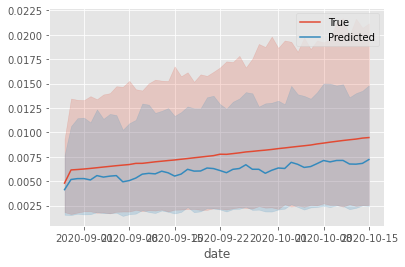

In [31]:
predicted= rr.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=Y_test.index,y=Y_test.values,ax=ax)
sns.lineplot(x=Y_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])
# plt.xticks.for

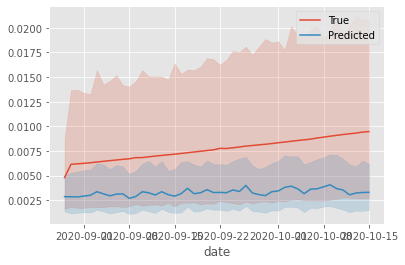

In [32]:
predicted= rr100.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=Y_test.index,y=Y_test.values,ax=ax)
sns.lineplot(x=Y_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

# KNN Regressor


In [33]:
#KNNREGRESSOR
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(algorithm='ball_tree', 
                            leaf_size=50, 
                            metric='minkowski',
                            metric_params=None, 
                            n_jobs=-1, 
                            n_neighbors=14, 
                            p=2,
                            weights='uniform')
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.815876117178702


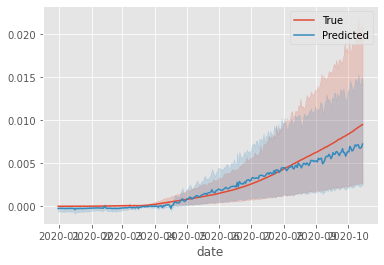

In [34]:
#Prediction on whole data
predicted = rr.predict(df.drop('total_cases',axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=df.index,y=df['total_cases'].values,ax=ax)
sns.lineplot(x=df.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

# Support Vector Regressor

In [35]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)

SVR()

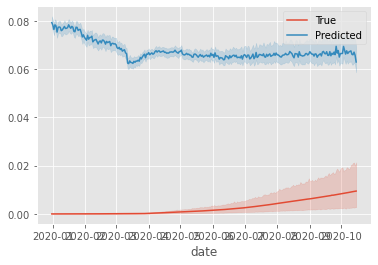

In [36]:
#Prediction on whole data
predicted = regressor.predict(df.drop('total_cases',axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=df.index,y=df['total_cases'].values,ax=ax)
sns.lineplot(x=df.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

# XGboost Regressor

Here we have used RandomizedSearchCV using various parmeters for hyperparameter tuning. Among the given parameter we search for those hyperparameter which gives best performance for our data.

In [37]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb_reg=xgb.XGBRegressor()

prams={
    'learning_rate':[0.03,0.05,0.1],
    'n_estimators':[500,2000,4000],
    'max_depth':[5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
# tscv = TimeSeriesSplit(n_splits=3)
random_clf=RandomizedSearchCV(xgb_reg, param_distributions=prams,verbose=1,
                                n_jobs=3,  n_iter=10)
random_clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 10.6min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 11.7min finished


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
        

In [38]:
random_clf.best_score_

0.9000775254609552

In [39]:
random_clf.score(X_test,Y_test)

0.9304389170085128

In [40]:
random_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
random_clf.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 2000,
 'subsample': 0.3}

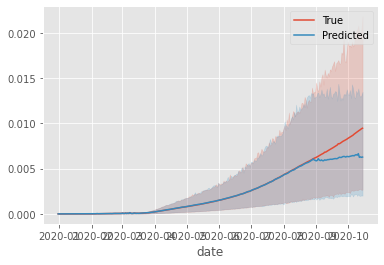

In [42]:
#Prediction on whole data
predicted = random_clf.best_estimator_.predict(df.drop('total_cases',axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=df.index,y=df['total_cases'].values,ax=ax)
sns.lineplot(x=df.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

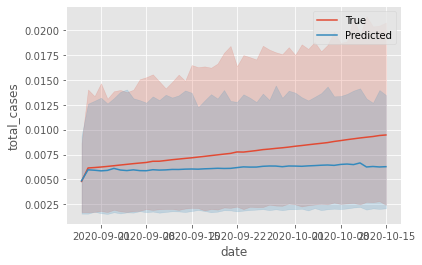

In [43]:
#Prediction on whole data
predicted = random_clf.best_estimator_.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=X_test.index,y=Y_test,ax=ax)
sns.lineplot(x=X_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

In [44]:
predicted.shape

(10061,)

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE for xgboostregressor: ")
print(mean_squared_error(predicted,Y_test))
print("R2 score for xgboostregressor: ")
print(r2_score(predicted,Y_test))

MSE for xgboostregressor: 
0.00023979893479745792
R2 score for xgboostregressor: 
0.8815051046457454
